<a href="https://colab.research.google.com/github/chowski3/assignment3/blob/main/Adam_Chow_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

## Adam Chow - ryp6vw

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 9.14 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier as kNNClassify
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

In [3]:
# 1 Load the ./data/car_data.csv data. Look at the head and dimensions of the data.
car_df = pd.read_csv('./assignment3/data/car_data.csv')
car_df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
# 2 Summarize the variables (User.ID, Gender, Age, AnnualSalary, Purchase).
# Are there any missings to clean?
# Convert the Gender categorical variable into a dummy variable that takes the value 0 for male and 1 for female.
# Create a matrix  𝑋  of predictors including Age and AnnualSalary, and an outcome  𝑦  equaling Purchase.

# Summarize
car_df.describe() # The count of every variable is 1000: no missing values.

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
car_df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [6]:
# Make Gender a Dummy Variable
car_df['Gender_Dummy'] = 0
car_df.loc[ car_df['Gender']== 'Female', 'Gender_Dummy'] = 1

# Define X matrix of predictors
X = car_df.loc[:,['Age', 'AnnualSalary']]

# Define y vector as Purchase
y = car_df['Purchased']

# Check to make sure Dummy variable still has the same counts
car_df['Gender_Dummy'].value_counts() # matches "Gender" column

1    516
0    484
Name: Gender_Dummy, dtype: int64

In [7]:
# Create a matrix X of Age and AnnualSalary and an outcome y equaling Purchased

X = car_df.loc[:, ['Age','AnnualSalary']]
y = car_df['Purchased']

In [8]:
# 3 MaxMin-normalize Age and AnnualSalary in X.

## Function used from kNN.ipynb
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [9]:
#4 Split the sample into a ~80% training dataset and a ~20% testing dataset.

# Split the Sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)

[9]


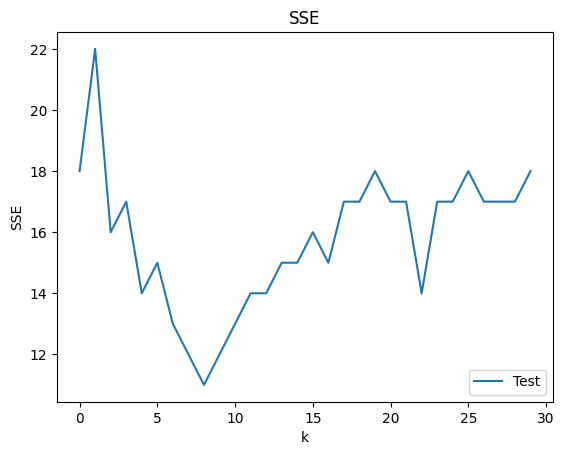

In [10]:
#5 Treat this as a classification problem:
# The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser.
# Use sklearn to determine the optimal number of neighbors  𝑘  to use.

### Taken from Q1.pdf from Canvas ###

# Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error

for k in range(k_bar):
  model = kNNClassify(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum(( y_test - y_hat)**2 ) # Save the computed SSE

# Lowest recorded SSE & Find the optimal value of k
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

# Plot SSE by k
plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

In [11]:
# 6

# Create and Run a Confusion Matrix
model = kNNClassify(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set
pd.crosstab(y_test, y_hat)


col_0,0,1
Purchased,,
0,106,3
1,8,83


# 6 cont.

How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

 From my model, it correctly identified 106/109 (97.24%) fails and 83/91 (91.21%) sales. Our model is particularly strong in power, thus preventing type two errors very well. The model incorrectly predicted no sale when a sale did occur approximately 2.76% of the time. Overall, i would say that this cross tabulation shows that the model predicts a sale correctly fairly often.

In [12]:
# 7

# Resplit the data including the gender variable:
X = car_df.loc[:,['Age','AnnualSalary','Gender']]
y = car_df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)

# Use the selected k to train the model, not using the gender variable:
model = kNNClassify(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

print(f"Female Crosstab: {pd.crosstab(y_F, y_hat_F)}")
print(f"Male Crosstab: {pd.crosstab(y_M, y_hat_M)}")


Female Crosstab: col_0       0   1
Purchased        
0          47   6
1          15  43
Male Crosstab: col_0       0   1
Purchased        
0          51   5
1           8  25


# 7 cont.

90/111 = 81.08% for women in comparison to 76/89 = 85.39% for men. With this information, the model correctly predicted sales for women approximately 81% of the time and 85% of the time for men. Between the two sexes, it is clear that there is about a 4% difference in the accuracy of predicting sales. On the small scale, this value does not make much of a difference, but 4% can end up being a signifiicant difference when predicting values for subgroups over a large sample size.



**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [13]:
# 1
US_cars_df = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')

# Summarize
print(US_cars_df.describe()) # The count of every variable is 2499: no missing values.

# Drop Unwanted Columns
drop_cols = ['brand', 'model', 'title_status', 'color', 'vin', 'lot', 'state', 'country', 'condition']
US_cars_df = US_cars_df.drop(drop_cols, axis=1)

# Check for missing values
missing = US_cars_df.isna().sum()

# Print Missing Values and Dimensions of new, cleaned DF
print("\nMissing: \n" + str(missing))
print("\nDimensions: " + str(US_cars_df.columns))
US_cars_df.head()

        Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  18767.671469  2016.714286  5.229869e+04  1.676914e+08
std     721.543484  12116.094936     3.442656  5.970552e+04  2.038772e+05
min       0.000000      0.000000  1973.000000  0.000000e+00  1.593488e+08
25%     624.500000  10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    1249.000000  16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    1873.500000  25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    2498.000000  84900.000000  2020.000000  1.017936e+06  1.678055e+08

Missing: 
Unnamed: 0    0
price         0
year          0
mileage       0
dtype: int64

Dimensions: Index(['Unnamed: 0', 'price', 'year', 'mileage'], dtype='object')


,Unnamed: 0,price,year,mileage
0,0,6300,2008,274117
1,1,2899,2011,190552
2,2,5350,2018,39590
3,3,25000,2014,64146
4,4,27700,2018,6654


In [14]:
# 2

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

y = US_cars_df['price'] # Create target variable vector
X = US_cars_df.loc[:,['year','mileage']] # Create feature matrix

# Describe X
X = X.apply(maxmin)
X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [15]:
# 3

# Split the Sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)

k=3, SSE: 61140373440


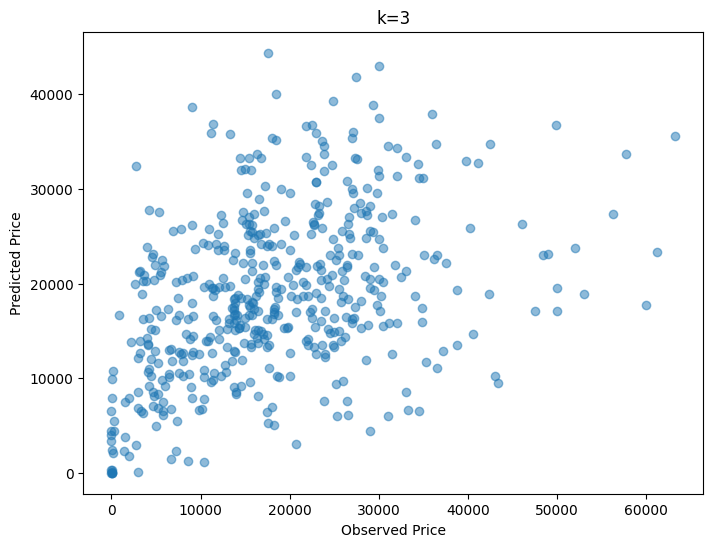

k=10, SSE: 50246063853


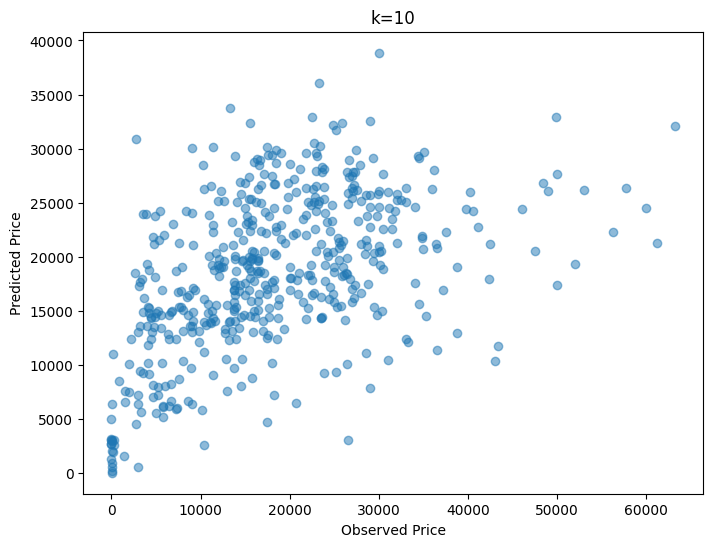

k=25, SSE: 45623312311


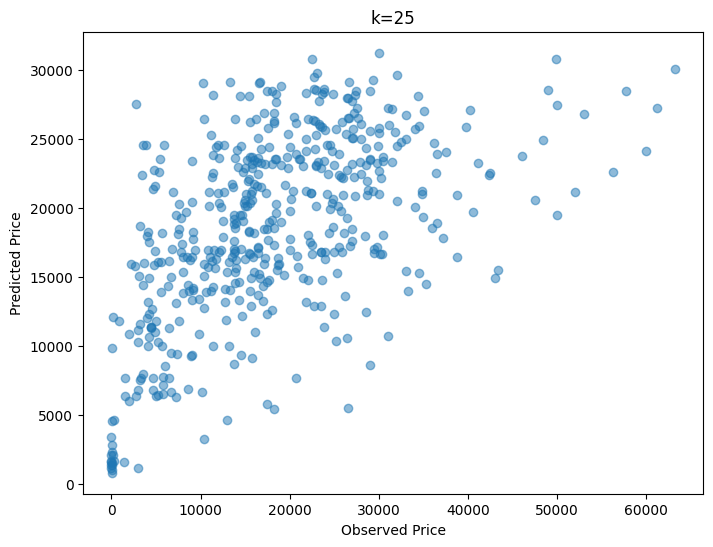

k=50, SSE: 45190525488


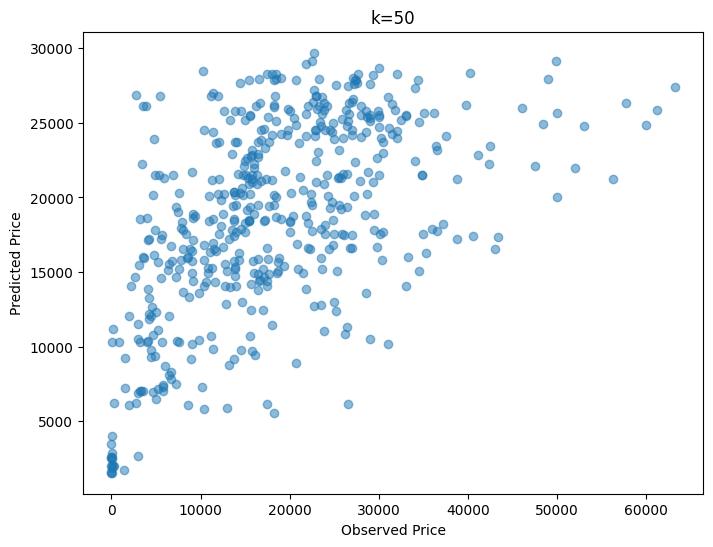

k=100, SSE: 45534557703


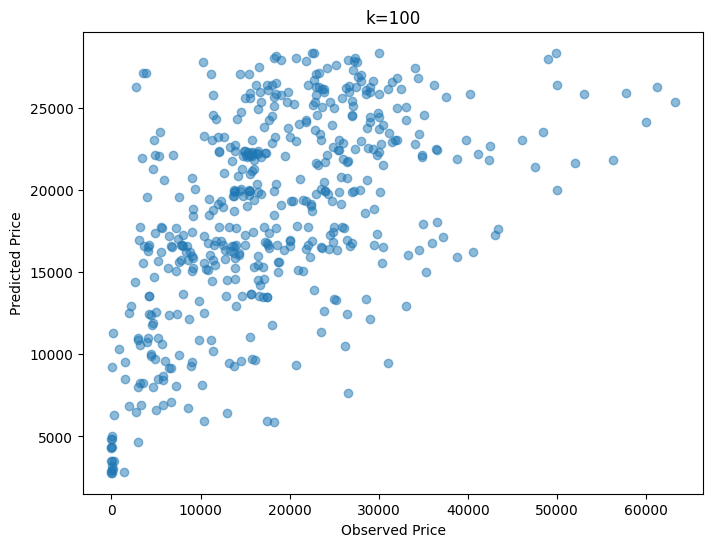

k=300, SSE: 47426669687


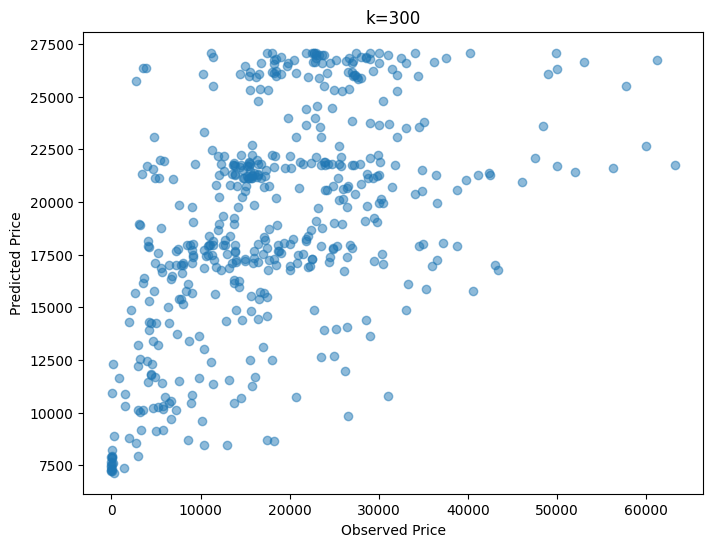

In [16]:
# 4
# Use the 𝑘NN algorithm for regression and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300.
# For each value of  𝑘 , compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value.
# What patterns do you notice as you increase  𝑘 ?

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    knnr = kNNRegression(n_neighbors=k)

    knnr.fit(X_train, y_train)

    y_pred = knnr.predict(X_test)

    # Calculate and Print the SSE
    sse = np.sum((y_test - y_pred) ** 2)
    print("k=%d, SSE: %.0f" % (k, sse))

    # Create a scatterplot for the predicted vs. observed 'price' for the current k
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("k=%d" % k)
    plt.xlabel('Observed Price')
    plt.ylabel('Predicted Price')
    plt.show()



Optimal k: 50
[61140373440.333336, 50246063852.82001, 45623312310.5936, 45190525488.1476, 45534557702.8468, 47426669687.08699]


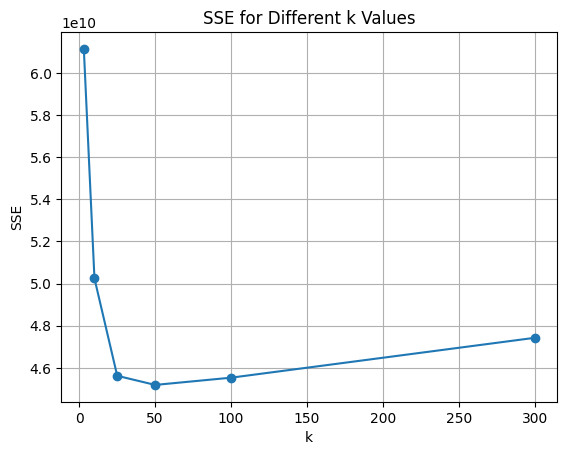

In [17]:
# 5
# Determine the optimal  𝑘  for these data.

# k_values = [3, 10, 25, 50, 100, 300]

sse_val = []

# kNN Regression Model
for k in k_values:
    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE = np.sum((y_test - y_hat) ** 2)
    sse_val.append(SSE)

optimal_k = k_values[np.argmin(sse_val)]

# Find optimal K
print(f"Optimal k: {optimal_k}")
print(sse_val)

# Plot Graph
plt.plot(k_values, sse_val, marker='o')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE for Different k Values')
plt.grid(True)
plt.show()

# 6

When analyzing the Actual vs. Predicted Price charts, very low values of k, such as k = 3, the model considers only the nearest neighbor for predictions. This results in a very flexible and sensitive model that essentially memorizes the training data. However, For very high values of k (k = 300), the model becomes too rigid and insensitive to the training data. The model essentially averages over a large number of neighbors, essentially smoothing out the predictions. When the k is optimal (in this case 50), the predictions align well with the actual prices without being too sensitive to noise or overly smoothed.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [18]:
#1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

# Create each data set is created by increasing the amount of noise (standard deviation) around the cluster centers
# from 0.125 to 0.25 to 0.5 to 1.0 to 2.0
df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

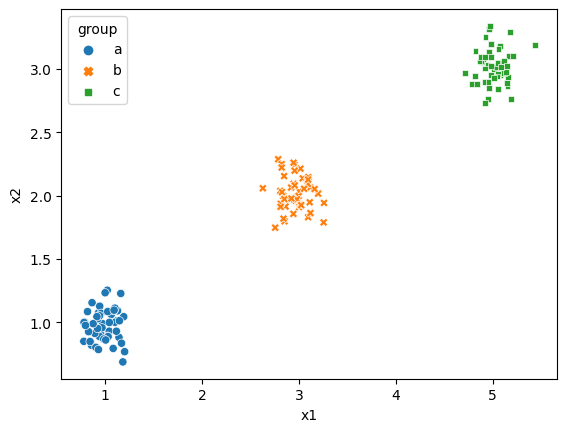

In [19]:
#2

# Scatterplots of the (𝑋1,𝑋2) points by group for 0.125
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

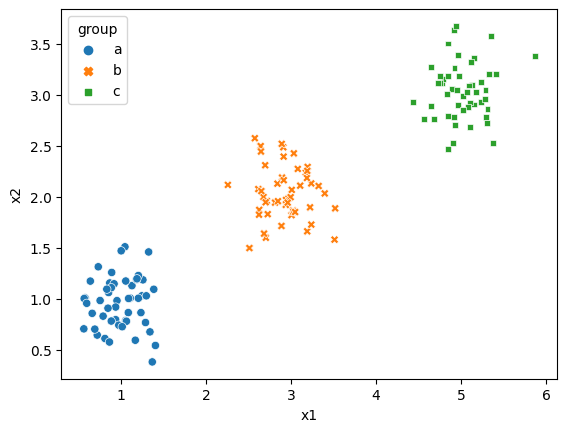

In [20]:
# Scatterplots of the (𝑋1,𝑋2) points by group for 0.25
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

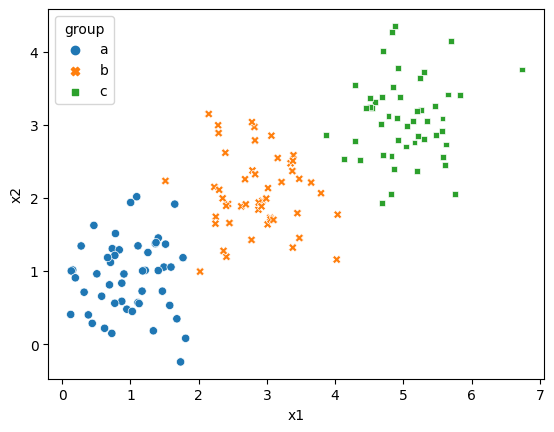

In [21]:
# Scatterplots of the (𝑋1,𝑋2) points by group for 0.5
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

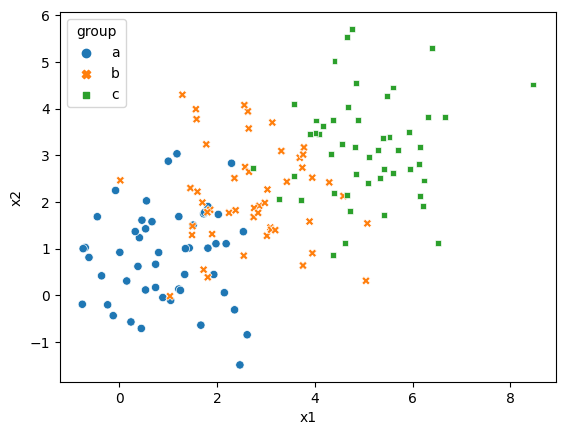

In [22]:
# Scatterplots of the (𝑋1,𝑋2) points by group for 1.0
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

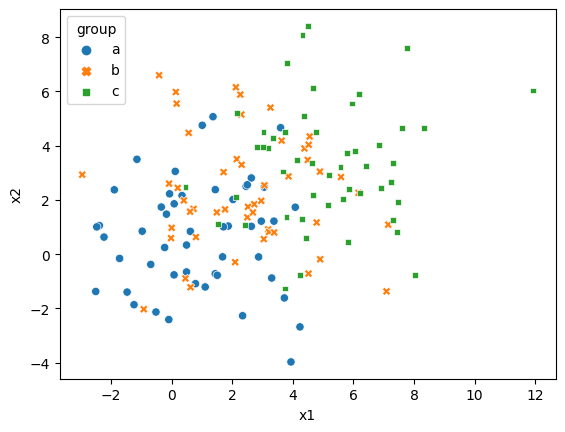

In [23]:
# Scatterplots of the (𝑋1,𝑋2) points by group for 2.0
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

# 2 cont.

Based on the five graphs, the percision of noise clearly increases substantially from 0.125 to 2.0. The distinction between the clusters becomes non existant as the noise increases. Noise contributes to increased uncertainty within KMeans, causing the visuals to begin blending the clusters together; starting at 1.0, data points merge between groups.

In [24]:
#3

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

def scree(data): # I built a function to make scree plots quickly
  # Preprocess the data:
  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data

  # Create a scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here

  for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE

  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
  axes.set_ylim(0, 35)

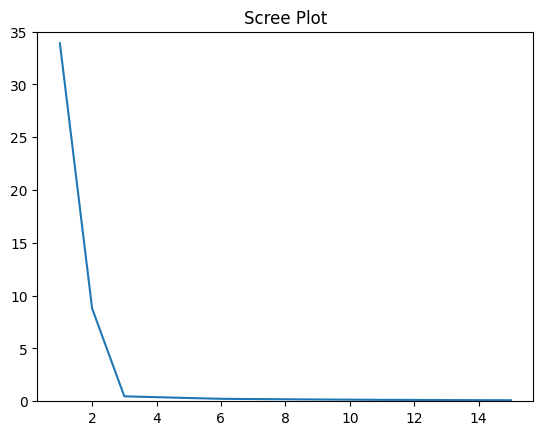

In [25]:
# Scree Plot for 0.125
scree(df0_125)

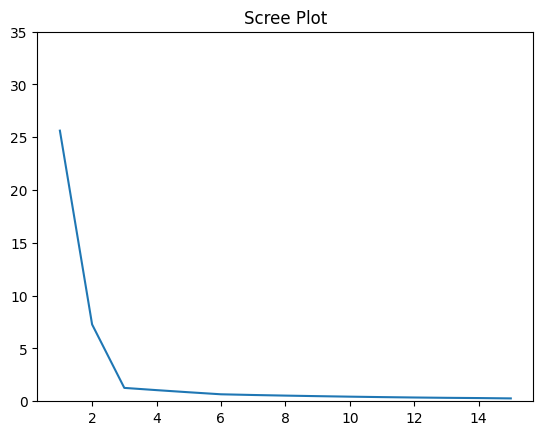

In [26]:
# Scree Plot for 0.25
scree(df0_25)

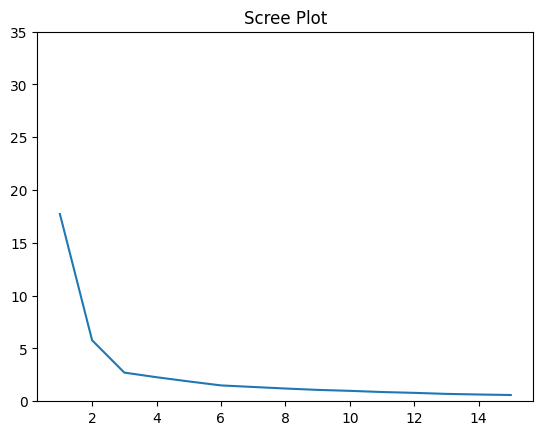

In [27]:
# Scree Plot for 0.5
scree(df0_5)

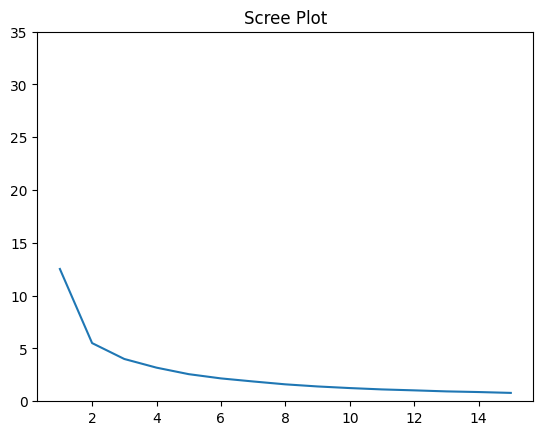

In [28]:
# Scree Plot for 1.0
scree(df1_0)

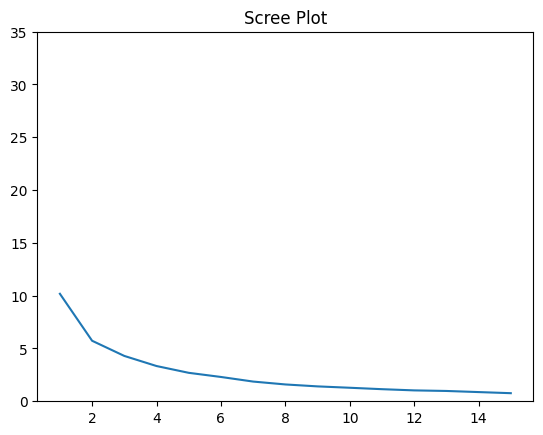

In [29]:
# Scree Plot for 2.0
scree(df2_0)

# 3 cont.

0.125 noise level - Very distinct k = 3.
0.25 noise level - Still very clear k = 3, not as distinct as the 0.125 though.
0.5 noise level - Still a distinct elbow at k = 3, hoever much weaker than the preivous two.
1.0 noise level - Pretty hard to make out an elbow, but it is there.
2.0 noise level - almost entirly no elbow, graph is almost smooth looking.

#4

The elbow method looks for an elbow or kink in the plot of SSE vs number of clusters k. This elbow represents the point where adding more clusters doesn't significantly decrease the SSE. When the true groups in the data are well-separated and distinct, adding more clusters will capture real structure, sharply decreasing the SSE. This leads to a clear elbow in the plot. As the groups become closer together and more overlapping, adding more clusters captures less additional structure. The marginal benefit of each new cluster decreases. The SSE curve gets smoother and the elbow becomes less defined. If the data is just a cloud without distinct groups, the SSE curve is fairly smooth. There is no clear kink point, indicating k is arbitrary. The data likely doesn't contain distinct clusters. So in summary, a sharp elbow indicates well-separated groups that are effectively modeled by clusters. A smooth curve indicates overlapping groups where clusters are less able to capture structure. The elbow distinguishes when clusters add value versus just overfitting noise.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?